<a href="https://colab.research.google.com/github/Vianmor/TelecomX_LATAM/blob/main/Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Telecom X - Análisis de Evasión de Clientes**

📌 **Extracción**

In [1]:
import pandas as pd
import json
import numpy as np

In [2]:
datosx=pd.read_json('/content/TelecomX_Data.json')

In [3]:
datosx

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


🔧 **Transformación**

### Realizaremos la normalizacion del dataframe

In [4]:
customer_normalizado= pd.json_normalize(datosx['customer'])

In [5]:
phone_normalizado= pd.json_normalize(datosx['phone'])

In [6]:
internet_normalizado= pd.json_normalize(datosx['internet'])

In [7]:
account_normalizado= pd.json_normalize(datosx['account'])

###Concatenaremos las columnas normalizadas con el dataframe

In [8]:
pd.concat([datosx, customer_normalizado, phone_normalizado, internet_normalizado, account_normalizado], axis=1)

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [9]:
datosx_normalizados= pd.concat([datosx, customer_normalizado, phone_normalizado, internet_normalizado, account_normalizado], axis=1)

In [10]:
datosx_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   customer          7267 non-null   object 
 3   phone             7267 non-null   object 
 4   internet          7267 non-null   object 
 5   account           7267 non-null   object 
 6   gender            7267 non-null   object 
 7   SeniorCitizen     7267 non-null   int64  
 8   Partner           7267 non-null   object 
 9   Dependents        7267 non-null   object 
 10  tenure            7267 non-null   int64  
 11  PhoneService      7267 non-null   object 
 12  MultipleLines     7267 non-null   object 
 13  InternetService   7267 non-null   object 
 14  OnlineSecurity    7267 non-null   object 
 15  OnlineBackup      7267 non-null   object 
 16  DeviceProtection  7267 non-null   object 


###Eliminacion de columnas: customer,	phone	,internet,	account

In [11]:
datosx_normalizados.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

In [12]:
datosx_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


###Renombraremos algunas columnas y daremos formato en minusculas

In [13]:
datosx_normalizados.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [14]:
datosx_normalizados.columns.str.lower().str.replace(' ', '_')

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges.monthly',
       'charges.total'],
      dtype='object')

In [15]:
datosx_normalizados.columns = datosx_normalizados.columns.str.lower().str.replace('([a-z])([A-Z])', r'\1_\2', regex=True).str.replace('.', '_').str.replace('_+', '_').str.replace(' ', '_')

In [16]:
datosx_normalizados.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges_monthly',
       'charges_total'],
      dtype='object')

In [17]:
datosx_normalizados = datosx_normalizados.rename(columns={'seniorcitizen': 'senior_citizen'})
datosx_normalizados = datosx_normalizados.rename(columns={'customerid': 'customer_id'})
datosx_normalizados = datosx_normalizados.rename(columns={'phoneservice': 'phone_service'})
datosx_normalizados = datosx_normalizados.rename(columns={'multiplelines': 'multiple_lines'})
datosx_normalizados = datosx_normalizados.rename(columns={'internetservice': 'internet_service'})
datosx_normalizados = datosx_normalizados.rename(columns={'onlinesecurity': 'online_security'})
datosx_normalizados = datosx_normalizados.rename(columns={'onlinebackup': 'online_backup'})
datosx_normalizados = datosx_normalizados.rename(columns={'deviceprotection': 'device_protection'})
datosx_normalizados = datosx_normalizados.rename(columns={'techsupport': 'tech_support'})
datosx_normalizados = datosx_normalizados.rename(columns={'streamingtv': 'streaming_tv'})
datosx_normalizados = datosx_normalizados.rename(columns={'streamingmovies': 'streaming_movies'})
datosx_normalizados = datosx_normalizados.rename(columns={'paperlessbilling': 'paperless_billing'})
datosx_normalizados = datosx_normalizados.rename(columns={'paymentmethod': 'payment_method'})


###Validacion sobre existencia de datos nulos

In [18]:
datosx_normalizados.isnull()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7263,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
datosx_normalizados.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


###Validacion de datos vacios

In [20]:
datosx_normalizados.dropna()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [21]:
datosx_normalizados.fillna(0)

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


###Realizaremos la parametrizacion de los datos

In [22]:
datosx_normalizados['charges_total'].str.split()

,charges_total
0,[593.3]
1,[542.4]
2,[280.85]
3,[1237.85]
4,[267.4]
...,...
7262,[742.9]
7263,[1873.7]
7264,[92.75]
7265,[4627.65]


In [23]:
datosx_normalizados['charges_total'].str.replace('/[\[\'\]]/g', '', regex=True)

,charges_total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4
...,...
7262,742.9
7263,1873.7
7264,92.75
7265,4627.65


In [24]:
datosx_normalizados['charges_total'] = datosx_normalizados['charges_total'].replace(' ', np.nan)
datosx_normalizados['charges_total']= datosx_normalizados['charges_total'].astype(np.float64)

In [25]:
datosx_normalizados['payment_method'].str.replace(r'\s*\(\s*\)', ' ', regex=True).str.replace('(|automatic|)', '', regex=True)


,payment_method
0,Mailed check
1,Mailed check
2,Electronic check
3,Electronic check
4,Mailed check
...,...
7262,Mailed check
7263,Electronic check
7264,Mailed check
7265,Mailed check


In [26]:
datosx_normalizados['payment_method']= datosx_normalizados['payment_method'].astype('category')

In [27]:
datosx_normalizados['paperless_billing']= datosx_normalizados['paperless_billing'].astype(bool)

In [28]:
datosx_normalizados['contract']= datosx_normalizados['contract'].astype('category')
datosx_normalizados['contract'].str.replace('[|]', ' ', regex=True).str.replace('-', ' ',regex=True)

,contract
0,One year
1,Month to month
2,Month to month
3,Month to month
4,Month to month
...,...
7262,One year
7263,Month to month
7264,Month to month
7265,Two year


In [29]:
datosx_normalizados['streaming_movies']= datosx_normalizados['streaming_movies'].astype('category')
datosx_normalizados['streaming_movies'].str.replace('-', ' ',regex=True)

,streaming_movies
0,No
1,Yes
2,No
3,Yes
4,No
...,...
7262,No
7263,Yes
7264,No
7265,Yes


In [30]:
datosx_normalizados['streaming_tv']= datosx_normalizados['streaming_tv'].astype('category')
datosx_normalizados['streaming_tv'].str.replace('-', ' ',regex=True)

,streaming_tv
0,Yes
1,No
2,No
3,Yes
4,Yes
...,...
7262,No
7263,No
7264,No
7265,No


In [31]:
datosx_normalizados['tech_support']= datosx_normalizados['tech_support'].astype('category')
datosx_normalizados['tech_support'].str.replace('-', ' ',regex=True)

,tech_support
0,Yes
1,No
2,No
3,No
4,Yes
...,...
7262,Yes
7263,No
7264,No
7265,Yes


In [32]:
datosx_normalizados['device_protection']= datosx_normalizados['device_protection'].astype('category')
datosx_normalizados['device_protection'].str.replace('-', ' ',regex=True)

,device_protection
0,No
1,No
2,Yes
3,Yes
4,No
...,...
7262,No
7263,No
7264,No
7265,Yes


In [33]:
datosx_normalizados['online_backup']= datosx_normalizados['online_backup'].astype('category')
datosx_normalizados['online_backup'].str.replace('-', ' ',regex=True)

,online_backup
0,Yes
1,No
2,No
3,Yes
4,No
...,...
7262,No
7263,No
7264,Yes
7265,No


In [34]:
datosx_normalizados['online_security']= datosx_normalizados['online_security'].astype('category')
datosx_normalizados['online_security'].str.replace('-', ' ',regex=True)

,online_security
0,No
1,No
2,No
3,No
4,No
...,...
7262,Yes
7263,No
7264,No
7265,Yes


In [35]:
datosx_normalizados['internet_service']= datosx_normalizados['internet_service'].astype('category')
datosx_normalizados['internet_service'].str.replace('-', ' ',regex=True)

,internet_service
0,DSL
1,DSL
2,Fiber optic
3,Fiber optic
4,Fiber optic
...,...
7262,DSL
7263,Fiber optic
7264,DSL
7265,DSL


In [36]:
datosx_normalizados['multiple_lines']= datosx_normalizados['multiple_lines'].astype('category')
datosx_normalizados['multiple_lines'].str.replace('-', ' ',regex=True)

,multiple_lines
0,No
1,Yes
2,No
3,No
4,No
...,...
7262,No
7263,Yes
7264,No
7265,No


In [37]:
datosx_normalizados['phone_service']= datosx_normalizados['phone_service'].astype(bool)

In [38]:
datosx_normalizados['dependents']= datosx_normalizados['dependents'].astype(bool)

In [39]:
datosx_normalizados['partner']= datosx_normalizados['partner'].astype(bool)

In [40]:
datosx_normalizados['gender']= datosx_normalizados['gender'].astype('category')
datosx_normalizados['gender'].str.replace('-', ' ',regex=True)

,gender
0,Female
1,Male
2,Male
3,Male
4,Female
...,...
7262,Female
7263,Male
7264,Male
7265,Male


In [41]:
datosx_normalizados['churn']= datosx_normalizados['churn'].astype(bool)

In [42]:
datosx_normalizados['customer_id'].str.replace('[|]', ' ', regex=True)

,customer_id
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7262,9987-LUTYD
7263,9992-RRAMN
7264,9992-UJOEL
7265,9993-LHIEB


In [43]:
datosx_normalizados['customer_id']= datosx_normalizados['customer_id'].astype(str)

In [44]:
datosx_normalizados['customer_id'].unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [45]:
datosx_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customer_id        7267 non-null   object  
 1   churn              7267 non-null   bool    
 2   gender             7267 non-null   category
 3   senior_citizen     7267 non-null   int64   
 4   partner            7267 non-null   bool    
 5   dependents         7267 non-null   bool    
 6   tenure             7267 non-null   int64   
 7   phone_service      7267 non-null   bool    
 8   multiple_lines     7267 non-null   category
 9   internet_service   7267 non-null   category
 10  online_security    7267 non-null   category
 11  online_backup      7267 non-null   category
 12  device_protection  7267 non-null   category
 13  tech_support       7267 non-null   category
 14  streaming_tv       7267 non-null   category
 15  streaming_movies   7267 non-null   category
 16  contra

In [46]:
datosx_normalizados.columns

Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'charges_monthly',
       'charges_total'],
      dtype='object')

##Crearemos una columna de cuentas diarias
####Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [47]:
datosx_normalizados.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002-ORFBO,True,Female,0,True,True,9,True,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,True,Male,0,True,True,9,True,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,True,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,0,True,True,4,True,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,True,13,True,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,True,3,True,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


In [48]:
datosx_normalizados['daily_accounts'] = datosx_normalizados.apply(lambda row: row['charges_monthly'] / 30 if row['charges_monthly'] > 0 else 0, axis=1)

In [49]:
datosx_normalizados

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,daily_accounts
0,0002-ORFBO,True,Female,0,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,True,Male,0,True,True,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,True,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,True,Male,0,True,True,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,True,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,True,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,True,Female,0,True,True,13,True,No,DSL,...,No,Yes,No,No,One year,True,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,True,Male,0,True,True,22,True,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,True,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,True,Male,0,True,True,2,True,No,DSL,...,No,No,No,No,Month-to-month,True,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,True,Male,0,True,True,67,True,No,DSL,...,Yes,Yes,No,Yes,Two year,True,Mailed check,67.85,4627.65,2.261667


📊 **Carga y análisis**

###Análisis descriptivo de los datos
####Calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [50]:
datosx_normalizados.describe()

,senior_citizen,tenure,charges_monthly,charges_total,daily_accounts
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.369074,24.571773,30.129572,2268.632997,1.004319
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,0.000000,55.000000,89.875000,3785.300000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [51]:
datosx_normalizados['charges_total'].mean()

np.float64(2280.6342130650496)

In [52]:
datosx_normalizados['churn'].mean()

np.float64(0.9691757258841338)

###Graficas sobre el comportamiento de los clientes ( churn)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
datosx_normalizados.shape

(7267, 22)

In [55]:
#datosx_normalizados.set_index('churn', inplace=True)

In [56]:
datosx_normalizados

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,daily_accounts
0,0002-ORFBO,True,Female,0,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,True,Male,0,True,True,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,True,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,True,Male,0,True,True,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,True,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,True,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,True,Female,0,True,True,13,True,No,DSL,...,No,Yes,No,No,One year,True,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,True,Male,0,True,True,22,True,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,True,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,True,Male,0,True,True,2,True,No,DSL,...,No,No,No,No,Month-to-month,True,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,True,Male,0,True,True,67,True,No,DSL,...,Yes,Yes,No,Yes,Two year,True,Mailed check,67.85,4627.65,2.261667


###Cuantos conectados tenemos respecto a los servicios

In [57]:
datosx_normalizados['contract'].value_counts()

,count
contract,
Month-to-month,4005
Two year,1743
One year,1519


In [58]:
contract_counts = datosx_normalizados['contract'].value_counts()
print(contract_counts)

contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64


In [59]:
col_dict = {'contract':contract_counts.index.tolist(),
            'contract_counts':contract_counts.values.tolist()}
col_dict

{'contract': ['Month-to-month', 'Two year', 'One year'],
 'contract_counts': [4005, 1743, 1519]}

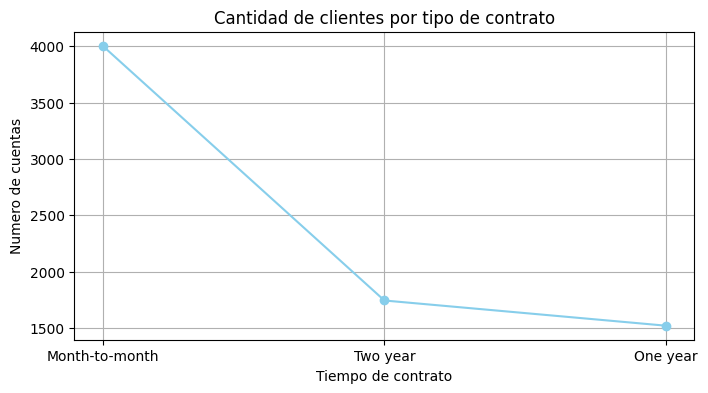

In [60]:
plt.figure(figsize=(8,4))
plt.plot(col_dict['contract'], col_dict['contract_counts'], color='skyblue', marker='o')
plt.title('Cantidad de clientes por tipo de contrato')
plt.xlabel('Tiempo de contrato')
plt.ylabel('Numero de cuentas')
plt.grid(True)
plt.show()

In [61]:
datosx_normalizados['churn'].value_counts()

,count
churn,
True,7043
False,224


In [62]:
churn_conexion = datosx_normalizados['churn'].value_counts()
print(churn_conexion)

churn
True     7043
False     224
Name: count, dtype: int64


###Obtendremos los porcentajes para la taza de conexión y desconexión respectivamente.
posteriormente el gráfico de Pastel

In [63]:
churn_conexion_porcentaje = (churn_conexion / churn_conexion.sum()) * 100
print(churn_conexion_porcentaje)

churn
True     96.917573
False     3.082427
Name: count, dtype: float64


In [64]:
colum1 = {'churn_conexion':churn_conexion.index.tolist(),
            'churn_conexion_porcentaje':churn_conexion_porcentaje.values.tolist()}
colum1

{'churn_conexion': [True, False],
 'churn_conexion_porcentaje': [96.91757258841338, 3.0824274115866244]}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

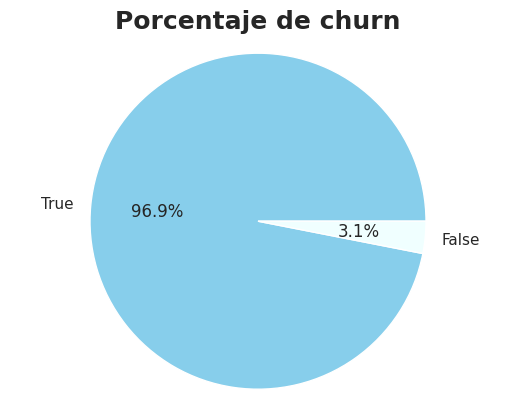

In [109]:
from types import FunctionType
from google.colab import files
from types import FunctionType
from google.colab import files

plt.pie(colum1['churn_conexion_porcentaje'], labels=colum1['churn_conexion'], autopct='%1.1f%%', colors=['skyblue','azure'])
plt.title('Porcentaje de churn',fontsize=18, fontweight='bold')
plt.axis('equal')
plt.savefig('pie_chart.png')
files.download('pie_chart.png')
plt.show()

####Recuento de evasión por variables categóricas
####como género, tipo de contrato, método de pago, entre otras.

In [66]:
datosx_normalizados.columns

Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'charges_monthly',
       'charges_total', 'daily_accounts'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

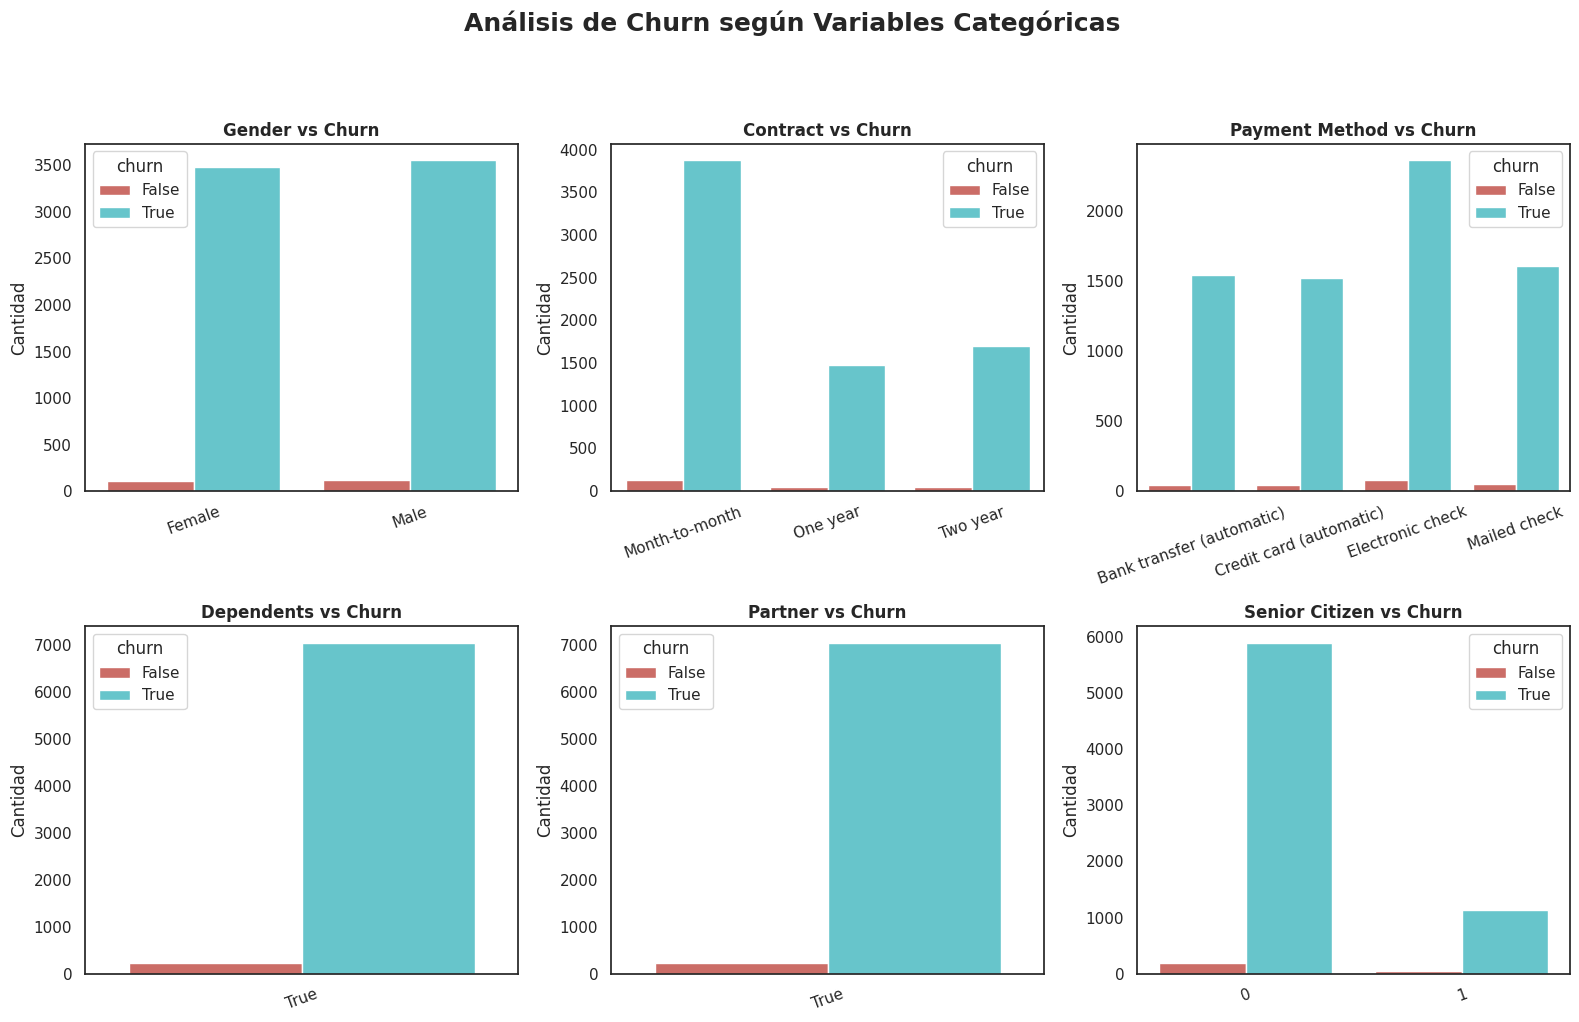

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Análisis de Churn según Variables Categóricas', fontsize=18, fontweight='bold', y=1.02)

# Lista de configuraciones para hacer el código más limpio
plots_info = [
    ('gender', 'Gender vs Churn'),
    ('contract', 'Contract vs Churn'),
    ('payment_method', 'Payment Method vs Churn'),
    ('dependents', 'Dependents vs Churn'),
    ('partner', 'Partner vs Churn'),
    ('senior_citizen', 'Senior Citizen vs Churn')
]

# Iterar por subplots y columnas
for ax, (col, title) in zip(axs.flat, plots_info):
    sns.countplot(x=col, hue='churn', data=datosx_normalizados, ax=ax, palette='hls')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Cantidad')
    ax.tick_params(axis='x', rotation=20)

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Deja espacio para el título general
fig.savefig('analisis_churn.png')
files.download('analisis_churn.png')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

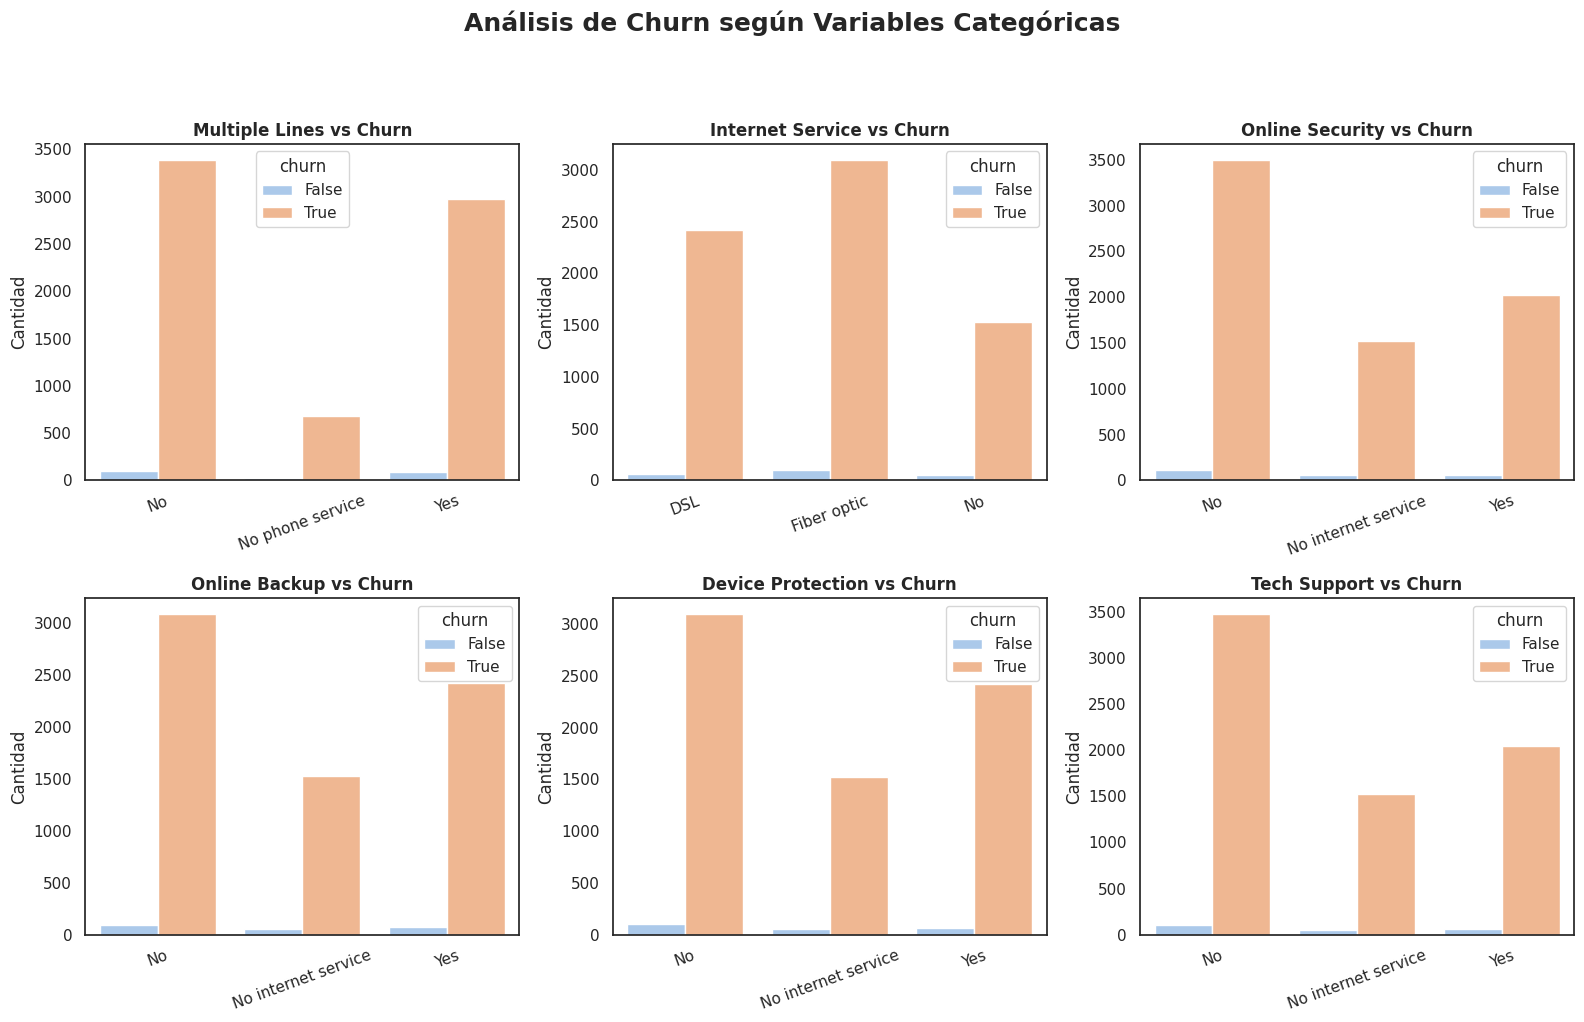

In [111]:
sns.set(style="white")
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Análisis de Churn según Variables Categóricas', fontsize=18, fontweight='bold', y=1.02)

# Lista de configuraciones para hacer el código más limpio
plots_info = [
    ('multiple_lines', 'Multiple Lines vs Churn'),
    ('internet_service', 'Internet Service vs Churn'),
    ('online_security', 'Online Security vs Churn'),
    ('online_backup', 'Online Backup vs Churn'),
    ('device_protection', 'Device Protection vs Churn'),
    ('tech_support', 'Tech Support vs Churn')
]

# Iterar por subplots y columnas
for ax, (col, title) in zip(axs.flat, plots_info):
    sns.countplot(x=col, hue='churn', data=datosx_normalizados, ax=ax, palette='pastel')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Cantidad')
    ax.tick_params(axis='x', rotation=20)

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Deja espacio para el título general
fig.savefig('analisis_churn_categoricas.png')
files.download('analisis_churn_categoricas.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

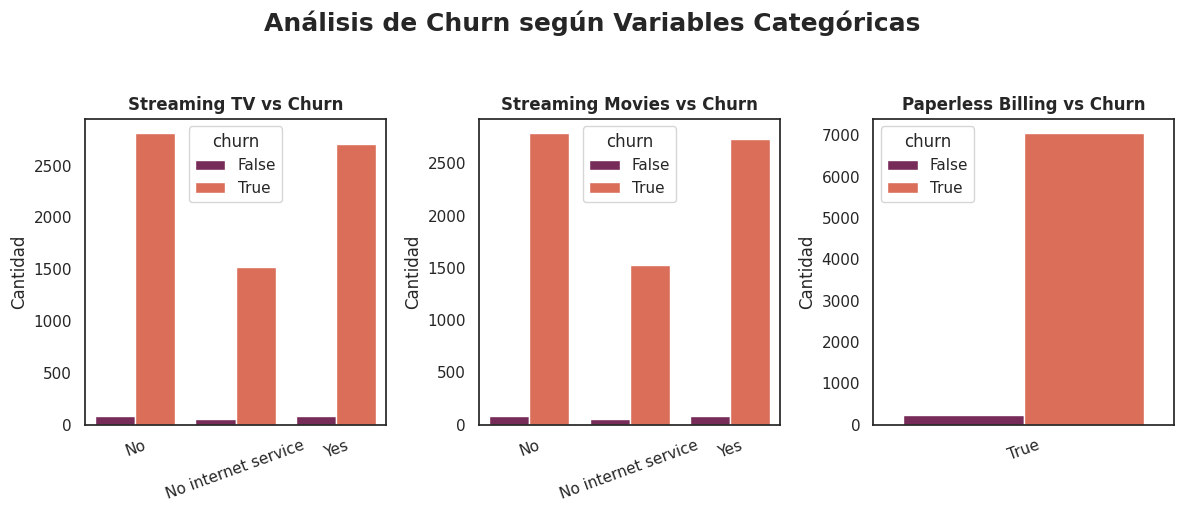

In [112]:
sns.set(style="white")
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle('Análisis de Churn según Variables Categóricas', fontsize=18, fontweight='bold', y=1.02)

# Lista de configuraciones para hacer el código más limpio
plots_info = [
    ('streaming_tv', 'Streaming TV vs Churn'),
    ('streaming_movies', 'Streaming Movies vs Churn'),
    ('paperless_billing', 'Paperless Billing vs Churn')
]

# Iterar por subplots y columnas
for ax, (col, title) in zip(axs.flat, plots_info):
    sns.countplot(x=col, hue='churn', data=datosx_normalizados, ax=ax, palette='rocket')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Cantidad')
    ax.tick_params(axis='x', rotation=20)

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Deja espacio para el título general
fig.savefig('analisis_churn_categoricas2.png')
files.download('analisis_churn_categoricas2.png')
plt.show()

###Conteo de evasión por variables numéricas

###En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

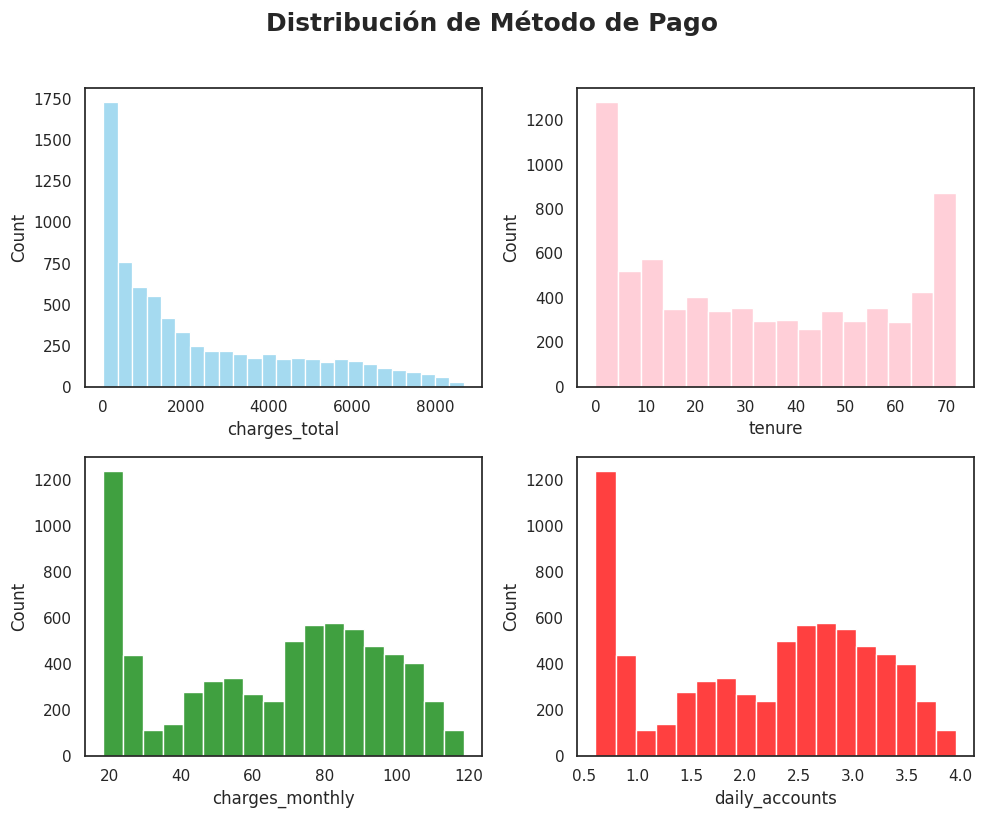

In [113]:
sns.set(style="white")
fig, axs = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle('Análisis de Churn según Variables Numéricas', fontsize=18, fontweight='bold', y=1.02)
sns.histplot(datosx_normalizados['charges_total'], kde=False, ax=axs[0, 0], color='skyblue')
fig.suptitle('Distribución de Gastos Totales', fontsize=18, fontweight='bold', y=1.02)
sns.histplot(datosx_normalizados['tenure'], kde=False, ax=axs[0, 1], color='pink')
fig.suptitle('Distribución de Tiempo de Contrato', fontsize=18, fontweight='bold', y=1.02)
sns.histplot(datosx_normalizados['charges_monthly'], kde=False, ax=axs[1, 0], color='green')
fig.suptitle('Distribución de Gastos Mensuales', fontsize=18, fontweight='bold', y=1.02)
sns.histplot(datosx_normalizados['daily_accounts'], kde=False, ax=axs[1, 1], color='red')
fig.suptitle('Distribución de Método de Pago', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('analisis_churn_numericas.png')
files.download('analisis_churn_numericas.png')
plt.show()



📄**Informe final**

###🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).


####**Objetivo:**
Incrementar y/o mantener la tasa de retención de nuestros clientes a un 95%, disminuir el CHURN, así como comprender el patrón de factores que interfieren en la toma de decisión del cliente de no continuar con el servicio.

###🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.



1.	El primer paso es descargar el archivo directo de la API y revisar el tipo de formato, para este caso el tipo de formato es un archivo JSON (Javascript Object Notation), revise el archivo para ver su estructura y contenido utilizando viewer JSON, a grandes rasgos contiene la información personal y del servicio al que esta suscripto, esta información esta contenida en diccionarios, por lo que tendremos que realizar un tratamiento específico a los datos.
2.	Elegir el programa que se utilizara para crear el script, yo elegí trabajar con Google Colab.
3.	Cree un nuevo notebook y para iniciar cargue las librerías que se utilizaran a lo largo del proyecto, me estaré enfocando en las librerías como Pandas ya que necesitamos normalizar los datos contenidos en las llaves y crear un nuevo Dataframe para continuar con el tratamiento de datos, me apoyare de la biblioteca Numpy para obtener análisis matemáticos mas precisos y mejorar nuestro análisis de datos y por ultimo necestaremos algunas bibliotecas para la visualización de datos como Matplotlib y Seaborn.
4.	Para realizar la extracción de los datos utilizaremos el comando pd.read_json (“nombre del archivo o Url”), notamos que el archivo esta constituido por 6 columnas y dentro de las ultimas 4 columnas se visualizan llaves con mas datos en su interior, por lo que tenemos que realizar la normalización de los datos para poder crear nuestro Dataframe, existen dos formas de realizar esta normalización por medio del comando pd.json_normalize(“nombre de la columna” o columnas a normalizar”).
5.	Guardamos nuestras nuevas columnas, ahora concatenamos las columnas anteriores con las obtenidas, y creamos nuestro Dataframe.
6.	Mi recomendación en este paso es verificar el tipo de datos que tenemos en nuestro dataframe, utilizando el comando .info() en este caso tenemos de tipo objeto, de tipo float64 y de tipo int64, también aquí podemos visualizar si existen valores nulos, posteriormente procedemos a realizar la limpieza de datos: eliminando columnas duplicadas.
7.	Continuando con la limpieza de datos, podemos renombrar columnas para un mejor entendimiento y manejo de los datos, le daremos formato como trabajar en minúsculas, eliminar espacios vacíos, validar caracteres, validación y eliminación de valores nulos con el comando .isnull() y .isnull().sum() respectivamente.
8.	Es importante destacar que tenemos que cerciorarnos que no existan valores faltantes o NAN para que no afecten los resultados obtenidos dentro de nuestro análisis., con el comando .dropna() y en el caso de que hubiesen utilizaremos el comando .fillna(0) tenemos que entender bien esta sección para evitar borrar información o llenar huecos que no se utilizan o que pueden tener un impacto negativo.
9.	Realizaremos la parametrización de los datos, en este caso específico se necesitan cambiar de tipo objeto a otros tipos como categorías, booleanos etc.
10.	Por utlimo nos piden que se cree una nueva columna con las cuentas diarias, este calculo lo podemos definiendo una función lambda con el concepto de la columna cargo mensual entre 30 días.


### 🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.


Para realizar este paso utilizaremos el método .describe(), para obtener algunos valores como  la media, la moda y la mediana, el valor promedio, los valores máximos y mínimos entre otros que nos pueden ayudar a entender mejor el comportamiento de nuestros datos, lo primero que realice fue visualizar el comportamiento de la cantidad de clientes con respecto a su tipo de contrato, esto me ayuda a saber cual es tiempo de permanencia del cliente.
Realice una grafica de torta para resaltar la tasa de desconexión mostrando como resultado el 3.1%.
Las graficas posteriores se obtuvieron para ver la relación que existe entre las variables categóricas vs churn y las variables numéricas vs churn con la finalidad de detectar los posibles factores que afectan la evasión de clientes.


###🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.


Con esto puedo concluir que los clientes que tenemos no realizan contratos por periodos largos, lo que aquí encuentro una oportunidad para mejorar y prolongar su estadía, por otra parte considero que el análisis se debería concentrar en los clientes que tienen su contrato mensual, esta es una oportunidad para estudiar el patrón de evasión entre estos clientes.

###🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

Sugiero que se fortalezca la relación por tipo de contrato, como incentivar a los clientes con periodos prolongados con alguna tasa preferencial, o un descuento especial para que se mantengan por mas tiempo con la empresa y es una forma de reconocer a este tipo de cliente.
Podría también sugerir que se analicen las áreas geográficas por que  no todos los servicios se encuentran disponibles y esto también puede afectar las estadías con la empresa, y una oportunidad de negocio que también pude observar es en las áreas que no hay esta infraestructura se analice su costo-beneficio y determinar si es viable integrarla a la infraestructura.
